In [1]:
from bollinger_bands import bb_model
import pandas as pd

# Colecting data

In [2]:
stock_list = ['AMD', 'TSLA', 'AAPL', 'F', 'AAL', 'NVDA', 'PFE', 'INTC', 'KEY',
       'BAC', 'CCL', 'AMZN', 'T', 'KMI', 'PYPL', 'BA', 'UBER', 'MSFT',
       'XOM', 'HBAN', 'GOOG', 'BMY', 'META', 'TFC', 'WFC', 'GM', 'CSX',
       'CVS', 'VZ', 'PCG', 'MMM']

In [3]:
test_list = []
errors = []
stop_loss_list = [3,7,14,21,30]

for stock in stock_list:
    for stop_loss in stop_loss_list:

        try:
            test = bb_model(stock, stop_loss)

            results = {'Stock' : stock, 'Stop loss' : stop_loss, 'Buy n hold' : test[0], 'Long position return' : test[1], 
                       'Short position return' : test[2], 'Average return' : test[3]}

            test_list.append(results)

        except:
            errors.append({stock:stop_loss})

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

# Making main_df and error_df 

In [4]:
test_df = pd.DataFrame(test_list)

In [5]:
test_df.sample(5)

,Stock,Stop loss,Buy n hold,Long position return,Short position return,Average return
17,F,14,64.041106,76.624944,2.103794,39.364369
119,TFC,30,101.276519,60.810552,65.865827,63.338189
135,CVS,3,468.291276,-31.803414,-27.714486,-29.758950
52,CCL,14,-43.286041,-59.668906,64.393998,2.362546
131,CSX,7,2830.601791,-15.988776,14.765020,-0.611878


In [6]:
errors_keys = []
errors_values = []

for error in errors:
    errors_keys.append(list(error.keys())[0])
    errors_values.append(list(error.values())[0])

In [7]:
error_df = pd.DataFrame()
error_df['Stocks'] = errors_keys
error_df['Stop loss'] = errors_values

error_df.head()

,Stocks,Stop loss


# Analysis

In [8]:
per_error = len(error_df) / (len(error_df) + len(test_df))

print(f'Error fee: {round(per_error*100,2)}%')

Error fee: 0.0%


In [9]:
test_df.head()

,Stock,Stop loss,Buy n hold,Long position return,Short position return,Average return
0,AMD,3,1059.727877,86.900315,2.208540,44.554427
1,AMD,7,1059.727877,59.819072,-10.563106,24.627983
2,AMD,14,1059.727877,59.819072,-10.563106,24.627983
3,AMD,21,1059.727877,59.819072,-10.563106,24.627983
4,AMD,30,1059.727877,59.819072,-10.563106,24.627983


In [10]:
# Long position vs Buy and hold
test_df['LP vs BH (%)'] = ((test_df['Long position return'] / test_df['Buy n hold']) - 1) * 100

# Short position vs Buy and hold
test_df['SP vs BH (%)'] = ((test_df['Short position return'] / test_df['Buy n hold']) - 1) * 100

# Average return vs Buy and hold
test_df['Avg vs BH (%)'] = ((test_df['Average return'] / test_df['Buy n hold']) - 1) * 100

In [11]:
round(test_df.sample(10),2)

,Stock,Stop loss,Buy n hold,Long position return,Short position return,Average return,LP vs BH (%),SP vs BH (%),Avg vs BH (%)
90,XOM,3,359.98,-13.59,-34.02,-23.80,-103.77,-109.45,-106.61
21,AAL,7,-31.82,53.57,24.33,38.95,-268.35,-176.47,-222.41
86,MSFT,7,2399.37,13.96,-39.35,-12.70,-99.42,-101.64,-100.53
80,UBER,3,51.11,4.84,40.36,22.60,-90.54,-21.04,-55.79
144,VZ,30,220.15,-5.72,-18.26,-11.99,-102.60,-108.29,-105.45
73,PYPL,21,60.26,10.72,12.04,11.38,-82.20,-80.01,-81.11
11,AAPL,7,47378.70,11.61,-36.55,-12.47,-99.98,-100.08,-100.03
38,INTC,21,168.56,-13.74,-0.19,-6.97,-108.15,-100.11,-104.13
36,INTC,7,168.56,-13.74,-0.19,-6.97,-108.15,-100.11,-104.13
27,NVDA,14,38390.69,203.15,24.46,113.81,-99.47,-99.94,-99.70


In [12]:
return_df = test_df.groupby('Stop loss')[['Buy n hold', 'Long position return', 'Short position return', 'Average return']].mean()
return_df

,Buy n hold,Long position return,Short position return,Average return
Stop loss,,,,
3,3940.907863,14.848392,7.107326,10.977859
7,3940.907863,24.999158,5.490863,15.245011
14,3940.907863,25.892167,5.881432,15.886800
21,3940.907863,25.892167,5.881432,15.886800
30,3940.907863,25.892167,5.881432,15.886800


In [13]:
compare_df = test_df.groupby('Stop loss')[['LP vs BH (%)', 'SP vs BH (%)', 'Avg vs BH (%)']].mean()
compare_df

,LP vs BH (%),SP vs BH (%),Avg vs BH (%)
Stop loss,,,
3,-692.618628,-2488.985805,-1590.802216
7,-1485.822367,-1459.081270,-1472.451818
14,-1597.342675,-1450.945804,-1524.144239
21,-1597.342675,-1450.945804,-1524.144239
30,-1597.342675,-1450.945804,-1524.144239


<Axes: xlabel='Stop loss'>

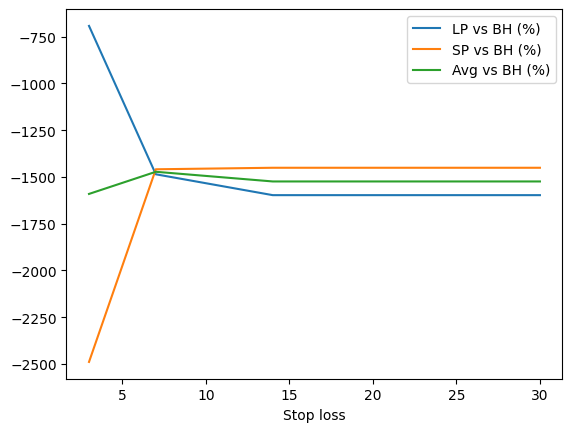

In [14]:
compare_df[['LP vs BH (%)', 'SP vs BH (%)', 'Avg vs BH (%)']].plot()

In [15]:
test_df.to_excel('../../return_data/bb_bands.xlsx')